# 📊 Comparação de Algoritmos - Contagem de Inversões

## 👨‍💻 Integrantes:
- Nome 1
- Nome 2

## 🎯 Objetivo

Comparar experimentalmente dois algoritmos para **contagem de inversões** em vetores de inteiros:

- **Algoritmo 1 (Ingênuo)**: Complexidade \( O(n^2) \)
- **Algoritmo 2 (Divisão e Conquista)**: Complexidade \( O(n \log n) \)

Uma inversão em um vetor \( A \) ocorre quando existe um par \( (i, j) \) tal que \( i < j \) e \( A[i] > A[j] \).

---

## ⚙️ Descrição dos Algoritmos

### 🔴 Algoritmo Ingênuo - O(n²)

Percorre todos os pares possíveis no vetor e conta quantas vezes um valor anterior é maior que o posterior.

### 🟢 Algoritmo de Divisão e Conquista - O(n log n)

Adapta o algoritmo MergeSort para contar inversões durante o processo de intercalação.

---

## 🧪 Metodologia Experimental

- **Tamanhos de entrada (n):** 150 valores igualmente espaçados entre 10 e 10.000.
- **Número de instâncias por tamanho (m):** 15 vetores diferentes, gerados aleatoriamente.
- **Total de execuções:** 2 algoritmos × 150 tamanhos × 15 instâncias = **4.500 execuções**
- **Elementos de entrada (A[i]):** Inteiros aleatórios no intervalo \( [-2n, 2n] \)
- Ambos os algoritmos foram testados com as **mesmas entradas** para garantir justiça e comparar correção.
- Verificou-se que **ambos produzem os mesmos resultados** para todas as entradas.
---

## 📊 Resultados

| Métrica                             | Valor                          |
|-------------------------------------|---------------------------------|
| **Melhoria média**                  | 54,24x mais rápido              |
| **Desvio padrão da melhoria**       | ±29,23                          |
| **Tamanho máximo de entrada (n)**   | 10.000                          |
| **Tempo médio do ingênuo (em n=10k)** | até 3,4 segundos por vetor     |
| **Tempo médio do MergeSort**        | ~0,05 segundos por vetor       |

---

## ✅ Conclusões

- O algoritmo de divisão e conquista é **significativamente mais eficiente**, especialmente para entradas grandes.
- A curva de crescimento exponencial do algoritmo ingênuo torna seu uso inviável para \( n > 2.000 \).
- Ambos os algoritmos retornam **valores idênticos**, o que valida suas implementações.
- A análise experimental confirma a **eficiência teórica esperada** dos dois algoritmos.

---

## 📂 Repositório e Vídeo

- 🔗 Código-fonte e gráfico: [GitHub/Colab Link]
- ▶️ Apresentação em vídeo: [YouTube Link]

---

## 📚 Referências

- Cormen, T. H., et al. *Algoritmos: Teoria e Prática*.
- [Wikipedia – Inversion (discrete mathematics)](https://en.wikipedia.org/wiki/Inversion_(discrete_mathematics))


In [4]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

def count_inversions_naive(arr):
    count = 0
    n = len(arr)
    for i in range(n):
        for j in range(i + 1, n):
            if arr[i] > arr[j]:
                count += 1
    return count

def count_inversions_merge_sort(arr):
    def merge_sort(arr):
        if len(arr) <= 1:
            return arr, 0
        mid = len(arr) // 2
        left, inv_left = merge_sort(arr[:mid])
        right, inv_right = merge_sort(arr[mid:])
        merged, count_split = merge_and_count(left, right)
        return merged, inv_left + inv_right + count_split

    def merge_and_count(left, right):
        result = []
        i = j = inv_count = 0
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                inv_count += len(left) - i
                j += 1
        result.extend(left[i:])
        result.extend(right[j:])
        return result, inv_count

    _, total_inversions = merge_sort(arr)
    return total_inversions

def generate_input(n):
    return [random.randint(-2*n, 2*n) for _ in range(n)]


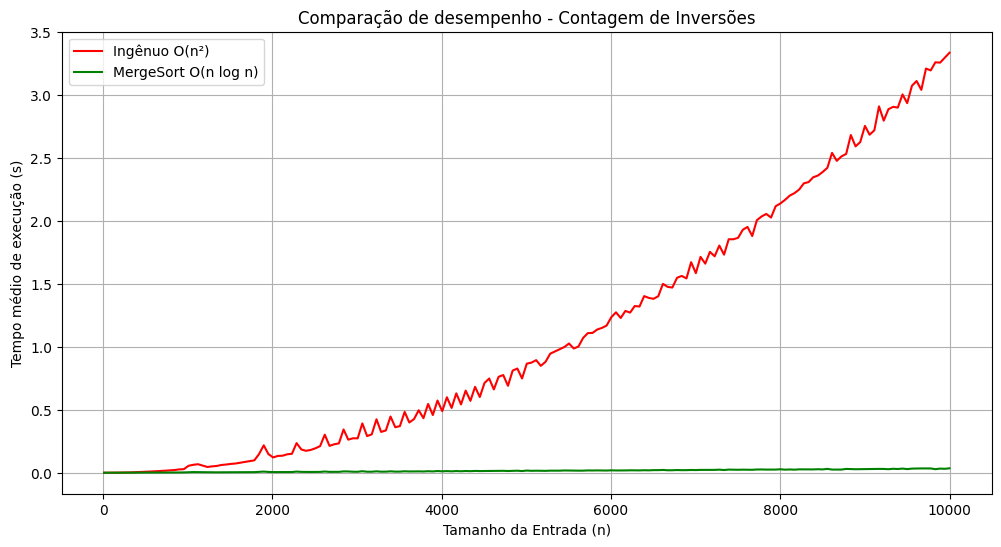

In [2]:
random.seed(42)

k = random.randint(100, 200)
m = random.randint(10, 20)

sizes = np.linspace(10, 10000, k, dtype=int)
naive_times = []
merge_times = []
relative_diffs = []

for n in sizes:
    inputs = [generate_input(n) for _ in range(m)]
    naive_total, merge_total = 0.0, 0.0
    diffs = []

    for arr in inputs:
        copy1 = list(arr)
        copy2 = list(arr)

        start = time.time()
        inv1 = count_inversions_naive(copy1)
        naive_total += time.time() - start

        start = time.time()
        inv2 = count_inversions_merge_sort(copy2)
        merge_total += time.time() - start

        assert inv1 == inv2, "Resultados diferentes!"

        if inv1 > 0:
            diffs.append((inv1 - inv2) / inv1)
        else:
            diffs.append(0)

    naive_times.append(naive_total / m)
    merge_times.append(merge_total / m)
    relative_diffs.append(np.mean(diffs))

plt.figure(figsize=(12,6))
plt.plot(sizes, naive_times, label='Ingênuo O(n²)', color='red')
plt.plot(sizes, merge_times, label='MergeSort O(n log n)', color='green')
plt.xlabel('Tamanho da Entrada (n)')
plt.ylabel('Tempo médio de execução (s)')
plt.title('Comparação de desempenho - Contagem de Inversões')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
melhoras = np.array(naive_times) / np.array(merge_times)
print("Melhoria média (vezes mais rápido):", round(np.mean(melhoras), 2))
print("Desvio padrão da melhoria:", round(np.std(melhoras), 2))

Melhoria média (vezes mais rápido): 54.24
Desvio padrão da melhoria: 29.23
